<a href="https://colab.research.google.com/github/kevincallan/emotion_recognition/blob/main/Features_explanation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Features Explaination From the MediaEval Dataset

Code to recreate the preexisting features in the MediaEval Dataset based on the collection of short videos


1.   HoG Descritpors 
2.   LBP 
3.   GIST
4.   Colour Histogram
5.   Fc7 layer from inception 
6.   C3D




Some notes on how SK Learn treats images. 
The aim is to turn the image file into a set of numbers or a two dimension numpy array that we can then operate on. 

Note features 5 and 6 involve some model processing i.e. taking a convolution layer in c3d or Fc7 Layer in no 5.

## HoG Descriptor

Historgram of oriented gradients.

Computes a single feature vector for the entire image. 
Computed by sliding a window detector (i.e. a 9x9 pixel grid) over the entire image with a HoG descriptor computed for each position in the image. 






Youtube [tutorial](https://www.youtube.com/watch?v=ou7SOV2xJ6k)





In [ ]:
# !curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
# import cv2
# img = cv2.imread('logo.png', cv2.IMREAD_UNCHANGED)
# cv2_imshow(img)

/usr/local/lib/python3.6/dist-packages/skimage/feature/_hog.py:239: skimage_deprecation: Argument `visualise` is deprecated and will be changed to `visualize` in v0.16
  'be changed to `visualize` in v0.16', skimage_deprecation)


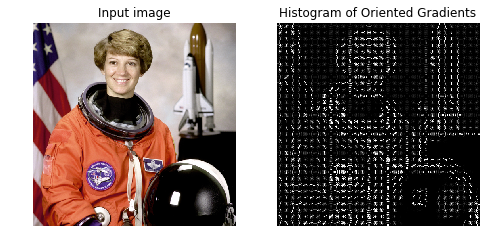

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

from skimage.feature import hog
from skimage import data, exposure


image = data.astronaut()


fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualise=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


## LBP 
Local Binary Patter

https://scikit-image.org/docs/dev/api/skimage.feature.html


local_binary_pattern(image, P, R, method='default')


See docs for more details on the SK Learn image feature set

Plotting LBP

https://scikit-image.org/docs/dev/auto_examples/features_detection/plot_local_binary_pattern.html

Rotated images matched against references using LBP:
original: brick, rotated: 30deg, match result:  brick
original: brick, rotated: 70deg, match result:  brick
original: grass, rotated: 145deg, match result:  grass


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


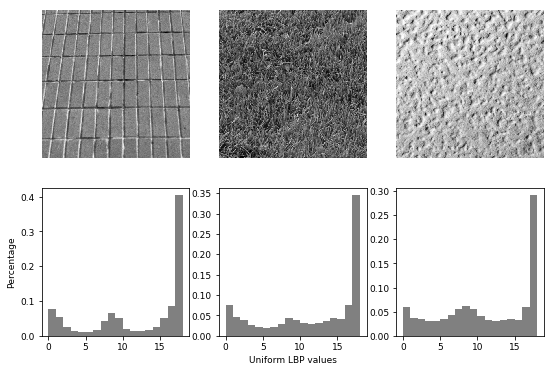

In [ ]:
from skimage.transform import rotate
from skimage.feature import local_binary_pattern
from skimage import data
from skimage.color import label2rgb

import numpy as np
import matplotlib.pyplot as plt


METHOD = 'uniform'
plt.rcParams['font.size'] = 9




# settings for LBP, I think setting the size of the two dimensional array 
radius = 2
n_points = 8 * radius


def kullback_leibler_divergence(p, q):
    p = np.asarray(p)
    q = np.asarray(q)
    filt = np.logical_and(p != 0, q != 0)
    return np.sum(p[filt] * np.log2(p[filt] / q[filt]))


def match(refs, img):
    best_score = 10
    best_name = None
    lbp = local_binary_pattern(img, n_points, radius, METHOD)
    n_bins = int(lbp.max() + 1)
    hist, _ = np.histogram(lbp, density=True, bins=n_bins, range=(0, n_bins))
    for name, ref in refs.items():
        ref_hist, _ = np.histogram(ref, density=True, bins=n_bins,
                                   range=(0, n_bins))
        score = kullback_leibler_divergence(hist, ref_hist)
        if score < best_score:
            best_score = score
            best_name = name
    return best_name

def hist(ax, lbp):
    n_bins = int(lbp.max() + 1)
    return ax.hist(lbp.ravel(), normed=True, bins=n_bins, range=(0, n_bins),
                   facecolor='0.5')  

brick = data.load('brick.png')
grass = data.load('grass.png')
wall = data.load('rough-wall.png')

refs = {
    'brick': local_binary_pattern(brick, n_points, radius, METHOD),
    'grass': local_binary_pattern(grass, n_points, radius, METHOD),
    'wall': local_binary_pattern(wall, n_points, radius, METHOD)
}

# classify rotated textures
print('Rotated images matched against references using LBP:')
print('original: brick, rotated: 30deg, match result: ',
      match(refs, rotate(brick, angle=30, resize=False)))
print('original: brick, rotated: 70deg, match result: ',
      match(refs, rotate(brick, angle=70, resize=False)))
print('original: grass, rotated: 145deg, match result: ',
      match(refs, rotate(grass, angle=145, resize=False)))

# plot histograms of LBP of textures
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3,
                                                       figsize=(9, 6))
plt.gray()

ax1.imshow(brick)
ax1.axis('off')
hist(ax4, refs['brick'])
ax4.set_ylabel('Percentage')

ax2.imshow(grass)
ax2.axis('off')
hist(ax5, refs['grass'])
ax5.set_xlabel('Uniform LBP values')

ax3.imshow(wall)
ax3.axis('off')
hist(ax6, refs['wall'])

plt.show()

## Colour Histogram

https://www.pyimagesearch.com/2014/01/22/clever-girl-a-guide-to-utilizing-color-histograms-for-computer-vision-and-image-search-engines/

## C3D

https://research.fb.com/c3d-generic-features-for-video-analysis/

## GIST


https://www.quora.com/Computer-Vision-What-is-a-GIST-descriptor

## Fc7 Layer From Inception

## Haar Cascades for facial detection 
https://www.quora.com/What-is-haar-cascade

https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html



## Note that the above face detection uses frontal facial features only 

To experiment with side profiles use this Haar cascade
https://github.com/opencv/opencv/blob/master/data/lbpcascades/lbpcascade_profileface.xml

## Emotion and Gender Detection 

See this link
https://medium.com/@hinasharma19se/facial-expressions-recognition-b022318d842a
https://www.apprendimentoautomatico.it/apprendimentoautomatico-wpblog/en/emotions-detection-via-facial-expressions-with-python-opencv/